In [1]:
import pandas as pd
import sys  
import os
import numpy as np


In [2]:
#get current working directory
cwd = os.getcwd()
#move to the directory where the script is located
script_dir = os.path.dirname(os.path.abspath(cwd))
os.chdir(script_dir)
#move to t

In [3]:
%pwd

'c:\\Users\\peera\\Desktop\\DroughtLSTM_oneday'

In [6]:
%cd ./visualize

c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize


In [8]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 48DD-7053

 Directory of c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize

06/08/2025  10:51 PM    <DIR>          .
06/08/2025  10:42 PM    <DIR>          ..
06/08/2025  10:51 PM    <DIR>          eda
06/08/2025  10:49 PM    <DIR>          results
06/08/2025  10:52 PM            13,755 visualize.ipynb
               1 File(s)         13,755 bytes
               4 Dir(s)  39,102,881,792 bytes free


In [9]:
pet_csv = pd.read_csv("results/PET_ConvLSTM/global_convlstm_improved_full_predictions.csv")

In [11]:
# seperate train,val,test based on given time value ending such as "2017-01-16"
train = pet_csv[pet_csv['time'] < '2017-01-16']
val = pet_csv[(pet_csv['time'] >= '2017-01-16') & (pet_csv['time'] < '2020-01-16')]
test = pet_csv[pet_csv['time'] >= '2020-01-16']

In [12]:
pet_csv.head()

,time,lat,lon,pet,pet_predicted,prediction_error,absolute_error
0,1902-01-16,6.25,101.25,102.3,108.231125,5.931122,5.931122
1,1902-01-16,6.25,101.75,99.2,104.797070,5.597076,5.597076
2,1902-01-16,6.75,99.75,127.1,129.103130,2.003136,2.003136
3,1902-01-16,6.75,100.25,117.8,121.380920,3.580917,3.580917
4,1902-01-16,6.75,100.75,108.5,111.485690,2.985687,2.985687


In [15]:
'''calculate and generate in this form {
    "train": {
        "rmse": 2.184229058743633,
        "mae": 1.6562595968038933,
        "r2": 0.9882751926056877
    },
    "validation": {
        "rmse": 2.6817942761578317,
        "mae": 2.0476934668066726,
        "r2": 0.9837688091698796
    },
    "test": {
        "rmse": 3.022044146122473,
        "mae": 2.1836607503949126,
        "r2": 0.9715993592316116
    }
}'''
def calculate_metrics(df):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    y_true = df['pet'].values
    y_pred = df['pet_predicted'].values

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    }
# Calculate metrics for each dataset
train_metrics = calculate_metrics(train)
val_metrics = calculate_metrics(val)
test_metrics = calculate_metrics(test)
# Combine results into a dictionary
results = {
    "train": train_metrics,
    "validation": val_metrics,
    "test": test_metrics
}
# Print the results
print(results)
# Save the results to a json
import json
with open('results/PET_ConvLSTM/global_convlstm_improved_full_metrics.json', 'w') as f:
    json.dump(results, f, indent=4)


{'train': {'rmse': np.float64(5.179156436541803), 'mae': np.float64(3.7765402896729006), 'r2': 0.934316543125932}, 'validation': {'rmse': np.float64(5.677804939387878), 'mae': np.float64(4.586583619801365), 'r2': 0.9116693412866181}, 'test': {'rmse': np.float64(6.290103174718797), 'mae': np.float64(4.526723865921787), 'r2': 0.8872489861785233}}


# Evaluation Metrics data

In [50]:
import os
import json
import pandas as pd
from glob import glob

import os
import json
import pandas as pd
from glob import glob

def load_all_metrics_json(root_dir):
    all_metrics = []
    json_files = glob(os.path.join(root_dir, '**', '*metrics*.json'), recursive=True)

    for json_file in json_files:
        if not os.path.isfile(json_file):
            print(f"⚠️ Skipping non-file: {json_file}")
            continue
        print(f"📄 Loading {json_file}")
        try:
            with open(json_file, 'r') as f:
                data = json.load(f)

            if not isinstance(data, dict):
                print(f"⚠️ Skipping non-dict JSON: {json_file}")
                continue

            flattened = {}
            for split, metrics in data.items():
                if not isinstance(metrics, dict):
                    print(f"⚠️ Skipping invalid split '{split}' in {json_file}")
                    continue
                for metric_name, value in metrics.items():
                    flattened[f"{split}_{metric_name}"] = value

            # Use folder name as a unique identifier
            folder_name = os.path.basename(os.path.dirname(json_file))
            flattened['folder_name'] = folder_name  # Optional if using index instead
            flattened['source_path'] = json_file

            all_metrics.append(flattened)

        except Exception as e:
            print(f"❌ Failed to load {json_file}: {e}")

    df = pd.DataFrame(all_metrics)

    return df

# Example usage
root_dir = os.getcwd()
df_metrics = load_all_metrics_json(root_dir)
print(df_metrics.head())


📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PET_ConvLSTM\global_convlstm_improved_full_metrics.json
📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PET_Global_XGBoost\evaluation_metrics.json
📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PET_LSTM_Global\global_lstm_model_metrics.json
📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PET_XGB_Local\all_local_models_evaluation_metrics.json
⚠️ Skipping non-dict JSON: c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PET_XGB_Local\all_local_models_evaluation_metrics.json
📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PRE_ConvLSTM\global_convlstm_improved_metrics.json
📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PRE_Global_XGBoost\evaluation_metrics.json
📄 Loading c:\Users\peera\Desktop\DroughtLSTM_oneday\visualize\results\PRE_LSTM_Global\global_lstm_model_metrics.json
📄 Loading c:\Users\peera\D

In [51]:
df_metrics

,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2,folder_name,...,validation_mse,validation_mape,test_mse,test_mape,train_pre,train_pet,validation_pre,validation_pet,test_pre,test_pet
0,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249,PET_ConvLSTM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.184229,1.656260,0.988275,2.681794,2.047693,0.983769,3.022044,2.183661,0.971599,PET_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,370.519167,15.168113,0.092129,411.508014,15.792475,0.071295,348.017200,14.300874,0.076689,PET_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581,PRE_ConvLSTM,...,2072.110840,1.920655e+09,3690.039062,1.442326e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931,PRE_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294,PRE_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRE_PET_ConvLSTM-MultiTask,...,NaN,NaN,NaN,NaN,"{'rmse': 14.690605971456513, 'mae': 9.99743556...","{'rmse': 4.513187793505633, 'mae': 3.326540231...","{'rmse': 11.425516156112762, 'mae': 8.76529693...","{'rmse': 4.682781642217733, 'mae': 3.645532131...","{'rmse': 65.13356544559994, 'mae': 45.16815948...","{'rmse': 7.461358534831491, 'mae': 5.850528240..."
7,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636,SPEI_ConvLSTM_Direct,...,0.798097,2.219772e+02,1.013969,1.947315e+02,NaN,NaN,NaN,NaN,NaN,NaN
8,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353,SPEI_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805,SPEI_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#drop PRE_PET_ConvLSTM-MultiTask row in index
if 'PRE_PET_ConvLSTM-MultiTask' in df_metrics.index:
    print("Dropping PRE_PET_ConvLSTM-MultiTask row from index")
    df_metrics = df_metrics.drop('PRE_PET_ConvLSTM-MultiTask')

In [53]:
df_metrics

,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2,folder_name,...,validation_mse,validation_mape,test_mse,test_mape,train_pre,train_pet,validation_pre,validation_pet,test_pre,test_pet
0,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249,PET_ConvLSTM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.184229,1.656260,0.988275,2.681794,2.047693,0.983769,3.022044,2.183661,0.971599,PET_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,370.519167,15.168113,0.092129,411.508014,15.792475,0.071295,348.017200,14.300874,0.076689,PET_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581,PRE_ConvLSTM,...,2072.110840,1.920655e+09,3690.039062,1.442326e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931,PRE_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294,PRE_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRE_PET_ConvLSTM-MultiTask,...,NaN,NaN,NaN,NaN,"{'rmse': 14.690605971456513, 'mae': 9.99743556...","{'rmse': 4.513187793505633, 'mae': 3.326540231...","{'rmse': 11.425516156112762, 'mae': 8.76529693...","{'rmse': 4.682781642217733, 'mae': 3.645532131...","{'rmse': 65.13356544559994, 'mae': 45.16815948...","{'rmse': 7.461358534831491, 'mae': 5.850528240..."
7,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636,SPEI_ConvLSTM_Direct,...,0.798097,2.219772e+02,1.013969,1.947315e+02,NaN,NaN,NaN,NaN,NaN,NaN
8,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353,SPEI_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805,SPEI_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# read json file at specified path
json_path = 'results/PET_ConvLSTM/global_convlstm_improved_full_metrics.json'
with open(json_path, 'r') as f:
    pet_metrics = json.load(f)
#
pet_metrics = {
    "train": {
        "pre": {
            "rmse": 14.690605971456513,
            "mae": 9.997435569763184,
            "r2": 0.9876049160957336,
            "mse": 215.81390380859375,
            "mape": 2088715264.0
        },
        "pet": {
            "rmse": 4.513187793505633,
            "mae": 3.326540231704712,
            "r2": 0.9872914552688599,
            "mse": 20.368864059448242,
            "mape": 1578545408.0
        }
    },
    "validation": {
        "pre": {
            "rmse": 11.425516156112762,
            "mae": 8.765296936035156,
            "r2": 0.992537260055542,
            "mse": 130.54241943359375,
            "mape": 1463109248.0
        },
        "pet": {
            "rmse": 4.682781642217733,
            "mae": 3.6455321311950684,
            "r2": 0.9489039182662964,
            "mse": 21.928443908691406,
            "mape": 3.489358425140381
        }
    },
    "test": {
        "pre": {
            "rmse": 65.13356544559994,
            "mae": 45.16815948486328,
            "r2": 0.8017730116844177,
            "mse": 4242.38134765625,
            "mape": 124625352.0
        },
        "pet": {
            "rmse": 7.461358534831491,
            "mae": 5.850528240203857,
            "r2": 0.8268740177154541,
            "mse": 55.671871185302734,
            "mape": 5.565570831298828
        }
    }
} 
# Add PET ConvLSTM metrics to df_metrics with the same structure
pet_metrics_flat = {
    "train_rmse": pet_metrics['train']['pet']['rmse'],
    "train_mae": pet_metrics['train']['pet']['mae'],
    "train_r2": pet_metrics['train']['pet']['r2'],
    "validation_rmse": pet_metrics['validation']['pet']['rmse'],
    "validation_mae": pet_metrics['validation']['pet']['mae'],
    "validation_r2": pet_metrics['validation']['pet']['r2'],
    "test_rmse": pet_metrics['test']['pet']['rmse'],
    "test_mae": pet_metrics['test']['pet']['mae'],
    "test_r2": pet_metrics['test']['pet']['r2']
}
pet_metrics_flat['folder_name'] = 'PET_ConvLSTM-MultiTask'
# Add the PET ConvLSTM row to the DataFrame
df_metrics = pd.concat([df_metrics, pd.DataFrame([pet_metrics_flat])])
# Do for PRE as well
pre_metrics_flat = {
    "train_rmse": pet_metrics['train']['pre']['rmse'],
    "train_mae": pet_metrics['train']['pre']['mae'],
    "train_r2": pet_metrics['train']['pre']['r2'],
    "validation_rmse": pet_metrics['validation']['pre']['rmse'],
    "validation_mae": pet_metrics['validation']['pre']['mae'],
    "validation_r2": pet_metrics['validation']['pre']['r2'],
    "test_rmse": pet_metrics['test']['pre']['rmse'],
    "test_mae": pet_metrics['test']['pre']['mae'],
    "test_r2": pet_metrics['test']['pre']['r2']
}
# Add the PRE ConvLSTM metrics to the DataFrame and set index to 'PRE_ConvLSTM-MultiTask'
pre_metrics_flat['folder_name'] = 'PRE_ConvLSTM-MultiTask'
df_metrics = pd.concat([df_metrics, pd.DataFrame([pre_metrics_flat])])

In [55]:
pet_metrics_flat

{'train_rmse': 4.513187793505633,
 'train_mae': 3.326540231704712,
 'train_r2': 0.9872914552688599,
 'validation_rmse': 4.682781642217733,
 'validation_mae': 3.6455321311950684,
 'validation_r2': 0.9489039182662964,
 'test_rmse': 7.461358534831491,
 'test_mae': 5.850528240203857,
 'test_r2': 0.8268740177154541,
 'folder_name': 'PET_ConvLSTM-MultiTask'}

In [56]:
pre_metrics_flat

{'train_rmse': 14.690605971456513,
 'train_mae': 9.997435569763184,
 'train_r2': 0.9876049160957336,
 'validation_rmse': 11.425516156112762,
 'validation_mae': 8.765296936035156,
 'validation_r2': 0.992537260055542,
 'test_rmse': 65.13356544559994,
 'test_mae': 45.16815948486328,
 'test_r2': 0.8017730116844177,
 'folder_name': 'PRE_ConvLSTM-MultiTask'}

In [57]:
df_metrics

,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2,folder_name,...,validation_mse,validation_mape,test_mse,test_mape,train_pre,train_pet,validation_pre,validation_pet,test_pre,test_pet
0,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249,PET_ConvLSTM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.184229,1.656260,0.988275,2.681794,2.047693,0.983769,3.022044,2.183661,0.971599,PET_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,370.519167,15.168113,0.092129,411.508014,15.792475,0.071295,348.017200,14.300874,0.076689,PET_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581,PRE_ConvLSTM,...,2072.110840,1.920655e+09,3690.039062,1.442326e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931,PRE_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294,PRE_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRE_PET_ConvLSTM-MultiTask,...,NaN,NaN,NaN,NaN,"{'rmse': 14.690605971456513, 'mae': 9.99743556...","{'rmse': 4.513187793505633, 'mae': 3.326540231...","{'rmse': 11.425516156112762, 'mae': 8.76529693...","{'rmse': 4.682781642217733, 'mae': 3.645532131...","{'rmse': 65.13356544559994, 'mae': 45.16815948...","{'rmse': 7.461358534831491, 'mae': 5.850528240..."
7,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636,SPEI_ConvLSTM_Direct,...,0.798097,2.219772e+02,1.013969,1.947315e+02,NaN,NaN,NaN,NaN,NaN,NaN
8,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353,SPEI_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805,SPEI_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#drop PRE_PET_ConvLSTM-MultiTask row in index
if 'PRE_PET_ConvLSTM-MultiTask' in df_metrics["folder_name"]:
    print("Dropping PRE_PET_ConvLSTM-MultiTask row from index")
    df_metrics = df_metrics.drop('PRE_PET_ConvLSTM-MultiTask')

In [59]:
df_metrics

,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2,folder_name,...,validation_mse,validation_mape,test_mse,test_mape,train_pre,train_pet,validation_pre,validation_pet,test_pre,test_pet
0,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249,PET_ConvLSTM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.184229,1.656260,0.988275,2.681794,2.047693,0.983769,3.022044,2.183661,0.971599,PET_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,370.519167,15.168113,0.092129,411.508014,15.792475,0.071295,348.017200,14.300874,0.076689,PET_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581,PRE_ConvLSTM,...,2072.110840,1.920655e+09,3690.039062,1.442326e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931,PRE_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294,PRE_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRE_PET_ConvLSTM-MultiTask,...,NaN,NaN,NaN,NaN,"{'rmse': 14.690605971456513, 'mae': 9.99743556...","{'rmse': 4.513187793505633, 'mae': 3.326540231...","{'rmse': 11.425516156112762, 'mae': 8.76529693...","{'rmse': 4.682781642217733, 'mae': 3.645532131...","{'rmse': 65.13356544559994, 'mae': 45.16815948...","{'rmse': 7.461358534831491, 'mae': 5.850528240..."
7,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636,SPEI_ConvLSTM_Direct,...,0.798097,2.219772e+02,1.013969,1.947315e+02,NaN,NaN,NaN,NaN,NaN,NaN
8,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353,SPEI_Global_XGBoost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805,SPEI_LSTM_Global,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_metrics = df_metrics[["train_rmse", "train_mae", "train_r2",
                           "validation_rmse", "validation_mae", "validation_r2",
                           "test_rmse", "test_mae", "test_r2", "folder_name"]]

In [61]:
df_metrics.dropna(inplace=True)

C:\Users\peera\AppData\Local\Temp\ipykernel_32884\3536202067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics.dropna(inplace=True)


In [62]:
df_metrics

,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2,folder_name
0,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249,PET_ConvLSTM
1,2.184229,1.656260,0.988275,2.681794,2.047693,0.983769,3.022044,2.183661,0.971599,PET_Global_XGBoost
2,370.519167,15.168113,0.092129,411.508014,15.792475,0.071295,348.017200,14.300874,0.076689,PET_LSTM_Global
3,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581,PRE_ConvLSTM
4,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931,PRE_Global_XGBoost
5,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294,PRE_LSTM_Global
7,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636,SPEI_ConvLSTM_Direct
8,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353,SPEI_Global_XGBoost
9,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805,SPEI_LSTM_Global
0,4.513188,3.326540,0.987291,4.682782,3.645532,0.948904,7.461359,5.850528,0.826874,PET_ConvLSTM-MultiTask


In [73]:
#aligin to make folder_name column to be the most left column before the metrics
df_metrics = df_metrics.set_index('folder_name')
df_metrics = df_metrics.reset_index()

In [74]:
df_metrics

,folder_name,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2
0,PET_ConvLSTM,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249
1,PET_Global_XGBoost,2.184229,1.656260,0.988275,2.681794,2.047693,0.983769,3.022044,2.183661,0.971599
2,PET_LSTM_Global,370.519167,15.168113,0.092129,411.508014,15.792475,0.071295,348.017200,14.300874,0.076689
3,PRE_ConvLSTM,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581
4,PRE_Global_XGBoost,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931
5,PRE_LSTM_Global,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294
6,SPEI_ConvLSTM_Direct,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636
7,SPEI_Global_XGBoost,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353
8,SPEI_LSTM_Global,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805
9,PET_ConvLSTM-MultiTask,4.513188,3.326540,0.987291,4.682782,3.645532,0.948904,7.461359,5.850528,0.826874


In [63]:
df_metrics.to_csv('results/global_convlstm_improved_full_metrics.csv', index=False)

In [64]:
# df_metrics_pre is the same as df_metrics but only contains the PRE metrics
df_metrics_pre = df_metrics[df_metrics['folder_name'].str.contains('PRE_')]
df_metrics_pet = df_metrics[df_metrics['folder_name'].str.contains('PET_')]
df_metrics_spei = df_metrics[df_metrics['folder_name'].str.contains('SPEI_')]

In [65]:
df_metrics_pre

,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2,folder_name
3,47.902183,28.866083,0.868505,45.520444,30.449352,0.881543,60.745692,40.709705,0.827581,PRE_ConvLSTM
4,11.241125,7.548360,0.993121,23.007908,12.048899,0.972541,23.620501,13.924363,0.973931,PRE_Global_XGBoost
5,16836.368068,100.419776,0.085781,17858.082447,102.802775,0.073655,15156.888718,100.603804,0.083294,PRE_LSTM_Global
0,14.690606,9.997436,0.987605,11.425516,8.765297,0.992537,65.133565,45.168159,0.801773,PRE_ConvLSTM-MultiTask


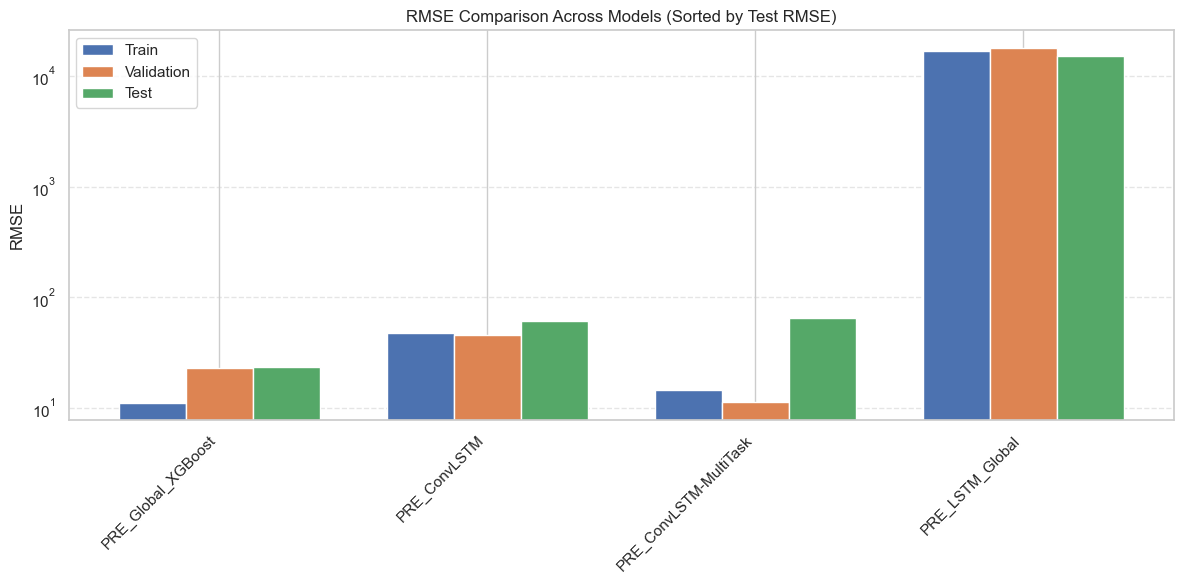

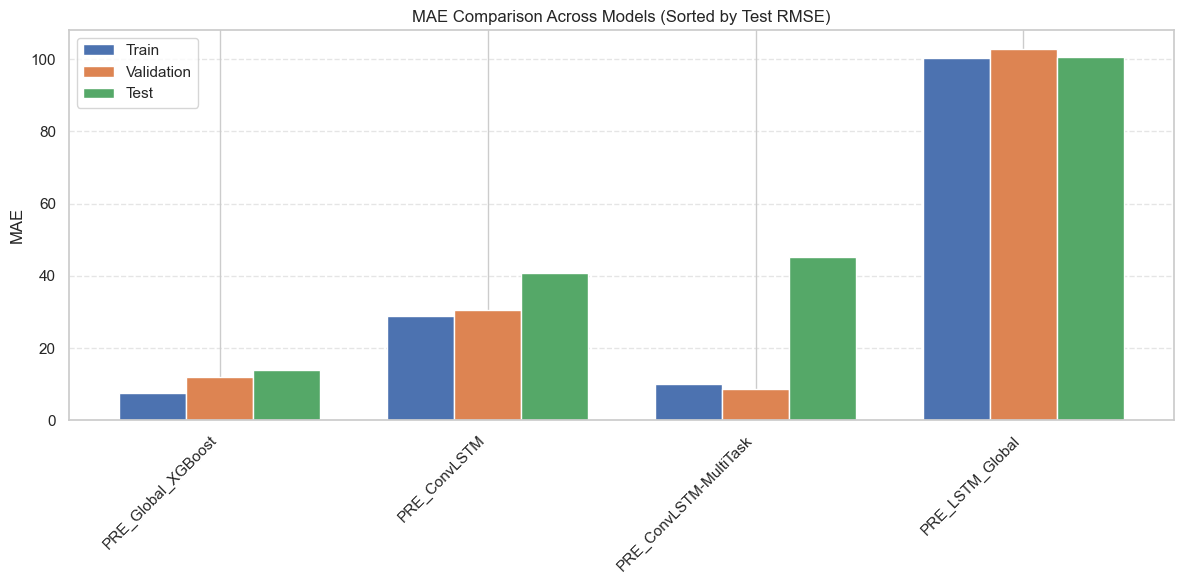

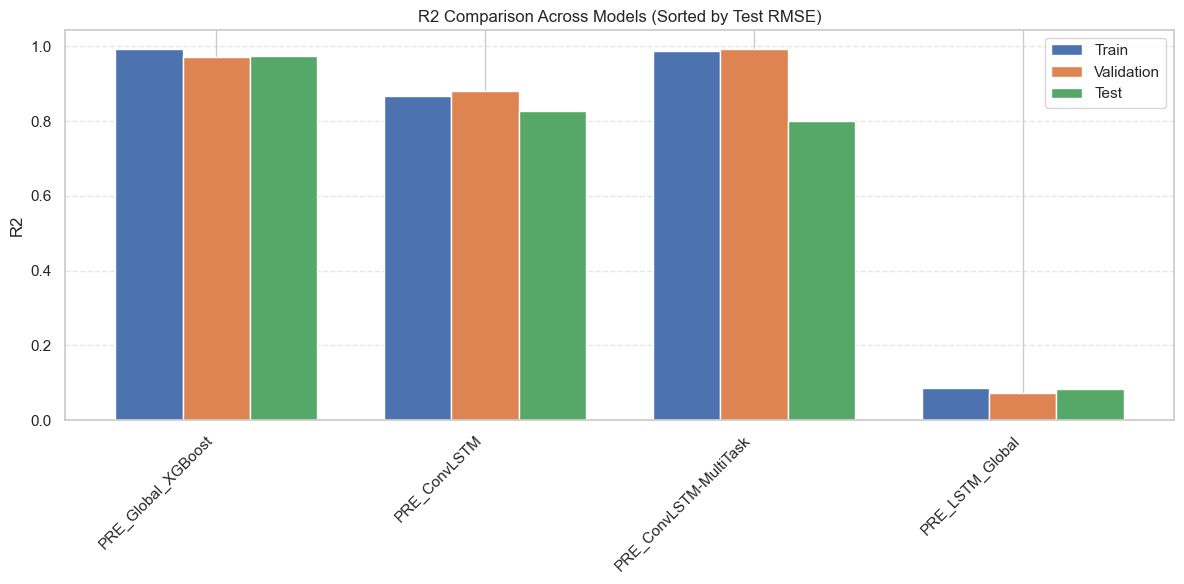

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = df_metrics_pre

# Define metrics to plot
metrics_to_plot = {
    "RMSE": ["train_rmse", "validation_rmse", "test_rmse"],
    "MAE": ["train_mae", "validation_mae", "test_mae"],
    "R2": ["train_r2", "validation_r2", "test_r2"]
}

datasets = ["Train", "Validation", "Test"]
width = 0.25

# Sort by test RMSE
df_sorted = df.sort_values(by="test_rmse", ascending=True).reset_index(drop=True)
model_names = df_sorted['folder_name'].values
x = np.arange(len(model_names))

# Plot
for metric_name, cols in metrics_to_plot.items():
    plt.figure(figsize=(12, 6))
    # if R^2 sort from high to low
    if metric_name == "R2":
        df_sorted = df_sorted.sort_values(by="test_r2", ascending=False).reset_index(drop=True)
        model_names = df_sorted['folder_name'].values
        x = np.arange(len(model_names))
    else:
        df_sorted = df_sorted.sort_values(by="test_rmse", ascending=True).reset_index(drop=True)
        model_names = df_sorted['folder_name'].values
        x = np.arange(len(model_names))
    for i, col in enumerate(cols):
        plt.bar(x + i * width, df_sorted[col], width=width, label=datasets[i])
    plt.xticks(x + width, model_names, rotation=45, ha='right')
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison Across Models (Sorted by Test RMSE)")
    plt.legend()
    if metric_name == "RMSE":
        plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


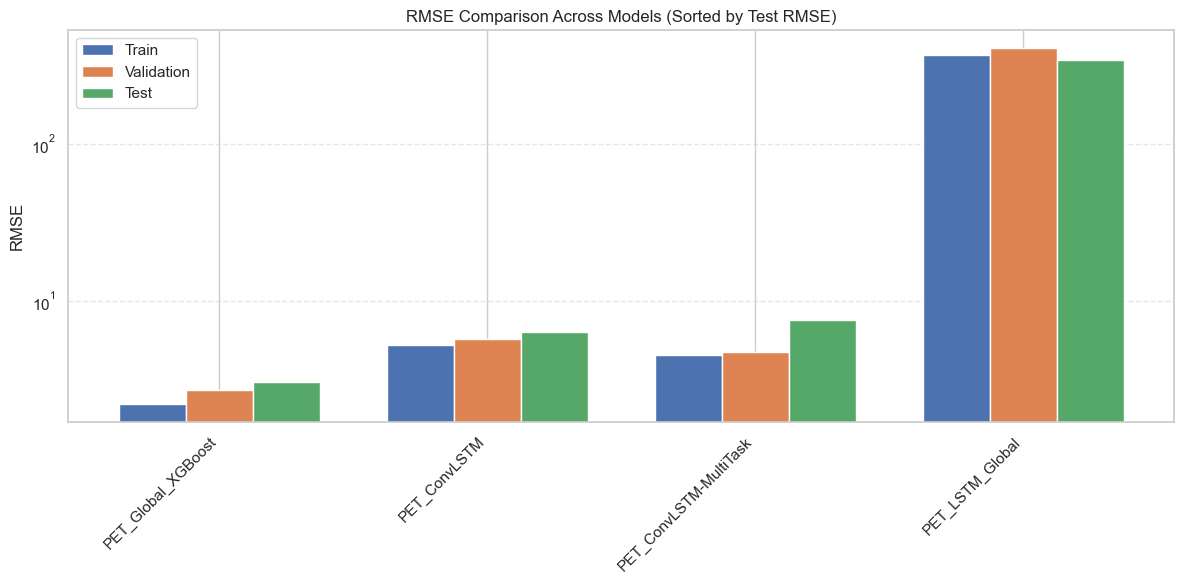

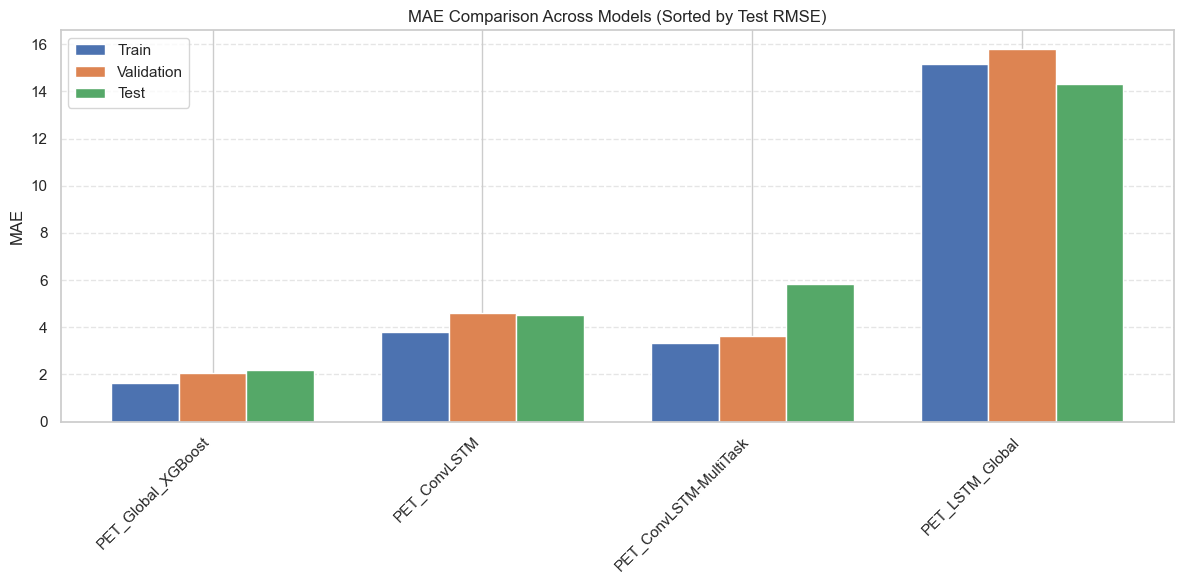

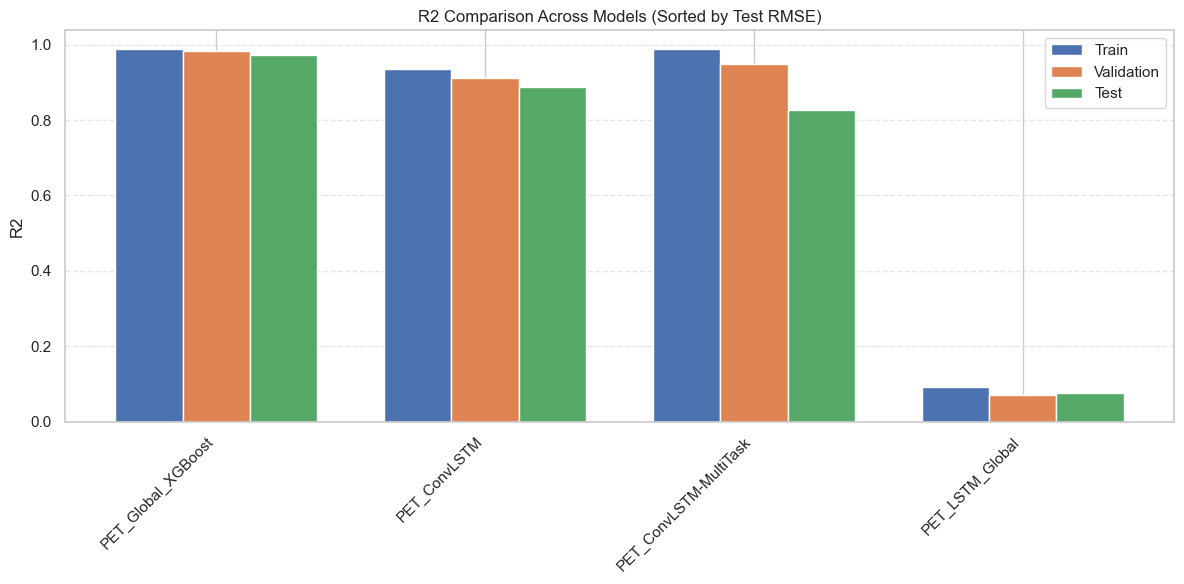

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = df_metrics_pet

# Define metrics to plot
metrics_to_plot = {
    "RMSE": ["train_rmse", "validation_rmse", "test_rmse"],
    "MAE": ["train_mae", "validation_mae", "test_mae"],
    "R2": ["train_r2", "validation_r2", "test_r2"]
}

datasets = ["Train", "Validation", "Test"]
width = 0.25

# Sort by test RMSE
df_sorted = df.sort_values(by="test_rmse", ascending=True).reset_index(drop=True)
model_names = df_sorted['folder_name'].values
x = np.arange(len(model_names))

# Plot
for metric_name, cols in metrics_to_plot.items():
    plt.figure(figsize=(12, 6))
    # if R^2 sort from high to low
    if metric_name == "R2":
        df_sorted = df_sorted.sort_values(by="test_r2", ascending=False).reset_index(drop=True)
        model_names = df_sorted['folder_name'].values
        x = np.arange(len(model_names))
    else:
        df_sorted = df_sorted.sort_values(by="test_rmse", ascending=True).reset_index(drop=True)
        model_names = df_sorted['folder_name'].values
        x = np.arange(len(model_names))
    for i, col in enumerate(cols):
        plt.bar(x + i * width, df_sorted[col], width=width, label=datasets[i])
    plt.xticks(x + width, model_names, rotation=45, ha='right')
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison Across Models (Sorted by Test RMSE)")
    plt.legend()
    if metric_name == "RMSE":
        plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# SPEI

In [96]:
spei_multi = pd.read_csv('results/spei_multiconv.csv')
spei_single = pd.read_csv('results/spei_singleconv.csv')
spei_raw = pd.read_csv('../data/full.csv')
spei_raw.head()
# Ensure 'time' columns are in datetime format for accurate merging
spei_multi['time'] = pd.to_datetime(spei_multi['time'])
#rename the 'spei' column to 'spei_predicted'
spei_multi.rename(columns={'spei': 'spei_predicted'}, inplace=True)
spei_single.rename(columns={'spei': 'spei_predicted'}, inplace=True)

In [91]:
spei_multi

,time,lat,lon,pre,pre_predicted,pre_prediction_error,pre_absolute_error,pet,pet_predicted,pet_prediction_error,pet_absolute_error,spei_predicted
0,1902-01-16,6.25,101.25,81.00000,81.520270,0.520271,0.520271,102.3,106.799460,4.499458,4.499458,-0.462184
1,1902-02-15,6.25,101.25,51.20000,23.102667,-28.097334,28.097334,100.8,113.239390,12.439384,12.439384,-1.826681
2,1902-03-16,6.25,101.25,86.40000,92.685740,6.285736,6.285736,124.0,121.878990,-2.121010,2.121010,-0.227721
3,1902-04-16,6.25,101.25,206.20000,170.271530,-35.928467,35.928467,114.0,115.130394,1.130394,1.130394,0.476980
4,1902-05-16,6.25,101.25,210.60000,175.588460,-35.011550,35.011550,102.3,102.456810,0.156807,0.156807,-0.525391
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2023-08-16,6.25,101.25,203.50000,142.459720,-61.040283,61.040283,102.3,97.927840,-4.372162,4.372162,-0.943274
1460,2023-09-16,6.25,101.25,299.20000,230.909990,-68.290020,68.290020,90.0,99.678764,9.678764,9.678764,0.194996
1461,2023-10-16,6.25,101.25,206.90001,281.437160,74.537155,74.537155,89.9,98.430504,8.530502,8.530502,-0.173474
1462,2023-11-16,6.25,101.25,426.70000,308.188720,-118.511290,118.511290,84.0,84.648890,0.648888,0.648888,-0.753902


In [98]:
# Ensure 'time' columns are in datetime format for accurate merging
spei_multi['time'] = pd.to_datetime(spei_multi['time'])
spei_single['time'] = pd.to_datetime(spei_single['time'])
# Rename the 'spei' column to 'spei_predicted'
spei_raw['time'] = pd.to_datetime(spei_raw['time'])

# Only keep necessary columns for merging
spei_raw_subset = spei_raw[['lat', 'lon', 'time', 'spei']]

# Merge on ['lat', 'lon', 'time']
spei_multi = spei_multi.merge(spei_raw_subset, on=['lat', 'lon', 'time'], how='left')
spei_single = spei_single.merge(spei_raw_subset, on=['lat', 'lon', 'time'], how='left')

# Preview result
print(spei_multi.head())

        time   lat     lon         pre  pre_predicted  pre_prediction_error  \
0 1902-01-16  6.25  101.25   81.000000       81.52027              0.520271   
1 1902-01-16  6.25  101.75  127.000000      141.74022             14.740219   
2 1902-01-16  6.75   99.75   43.600002       49.50343              5.903427   
3 1902-01-16  6.75  100.25   40.500000       46.68722              6.187221   
4 1902-01-16  6.75  100.75   43.100002       50.81467              7.714668   

   pre_absolute_error    pet  pet_predicted  pet_prediction_error  \
0            0.520271  102.3     106.799460              4.499458   
1           14.740219   99.2     104.200905              5.000908   
2            5.903427  127.1     129.733500              2.633507   
3            6.187221  117.8     119.497795              1.697792   
4            7.714668  108.5     113.688970              5.188973   

   pet_absolute_error  spei_predicted    spei_x    spei_y  
0            4.499458       -0.462184 -0.322998 -0

In [100]:
spei_multi.head()
spei_single.head()
#save the merged dataframes to csv
spei_multi.to_csv('results/spei_multi_merged.csv', index=False)
spei_single.to_csv('results/spei_single_merged.csv', index=False)

In [103]:
def calculate_metrics(df):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    y_true = df['pet'].values
    y_pred = df['pet_predicted'].values

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    }

In [111]:
# seperate train,val,test based on given time value ending such as "2017-01-16"
train = spei_multi[spei_multi['time'] < '2017-01-16']
val = spei_multi[(spei_multi['time'] >= '2017-01-16') & (spei_multi['time'] < '2020-01-16')]
test = spei_multi[spei_multi['time'] >= '2020-01-16']
train_metrics = calculate_metrics(train)
val_metrics = calculate_metrics(val)
test_metrics = calculate_metrics(test)
val_metrics

{'rmse': np.float64(5.318447395839683),
 'mae': np.float64(4.154190189478585),
 'r2': 0.9224966867954049}

In [110]:
train_single = spei_single[spei_single['time'] < '2017-01-16']
val_single = spei_single[(spei_single['time'] >= '2017-01-16') & (spei_single['time'] < '2020-01-16')]
test_single = spei_single[spei_single['time'] >= '2020-01-16']
train_single_metrics = calculate_metrics(train_single)
val_single_metrics = calculate_metrics(val_single)
test_single_metrics = calculate_metrics(test_single)
val_single_metrics

{'rmse': np.float64(5.677804939387878),
 'mae': np.float64(4.586583619801365),
 'r2': 0.9116693412866181}

In [114]:
# add SPEI ConvLSTM metrics to df_metrics with the same structure
spei_multi_metrics_flat = {
    "train_rmse": train_metrics['rmse'],
    "train_mae": train_metrics['mae'],
    "train_r2": train_metrics['r2'],
    "validation_rmse": val_metrics['rmse'],
    "validation_mae": val_metrics['mae'],
    "validation_r2": val_metrics['r2'],
    "test_rmse": test_metrics['rmse'],
    "test_mae": test_metrics['mae'],
    "test_r2": test_metrics['r2']
}
spei_multi_metrics_flat['folder_name'] = 'SPEI_ConvLSTM-MultiTask'
# Add the SPEI ConvLSTM row to the DataFrame
df_metrics = pd.concat([df_metrics, pd.DataFrame([spei_multi_metrics_flat])])
# Add SPEI Single ConvLSTM metrics to df_metrics with the same structure
spei_single_metrics_flat = {
    "train_rmse": train_single_metrics['rmse'],
    "train_mae": train_single_metrics['mae'],
    "train_r2": train_single_metrics['r2'],
    "validation_rmse": val_single_metrics['rmse'],
    "validation_mae": val_single_metrics['mae'],
    "validation_r2": val_single_metrics['r2'],
    "test_rmse": test_single_metrics['rmse'],
    "test_mae": test_single_metrics['mae'],
    "test_r2": test_single_metrics['r2']
}
spei_single_metrics_flat['folder_name'] = 'SPEI_ConvLSTM-SingleTask'
# Add the SPEI Single ConvLSTM row to the DataFrame
df_metrics = pd.concat([df_metrics, pd.DataFrame([spei_single_metrics_flat])])
# Save the updated DataFrame to CSV
df_metrics.to_csv('results/global_convlstm_improved_full_metrics.csv', index=False)
df_metrics_spei = df_metrics[df_metrics['folder_name'].str.contains('SPEI_')]

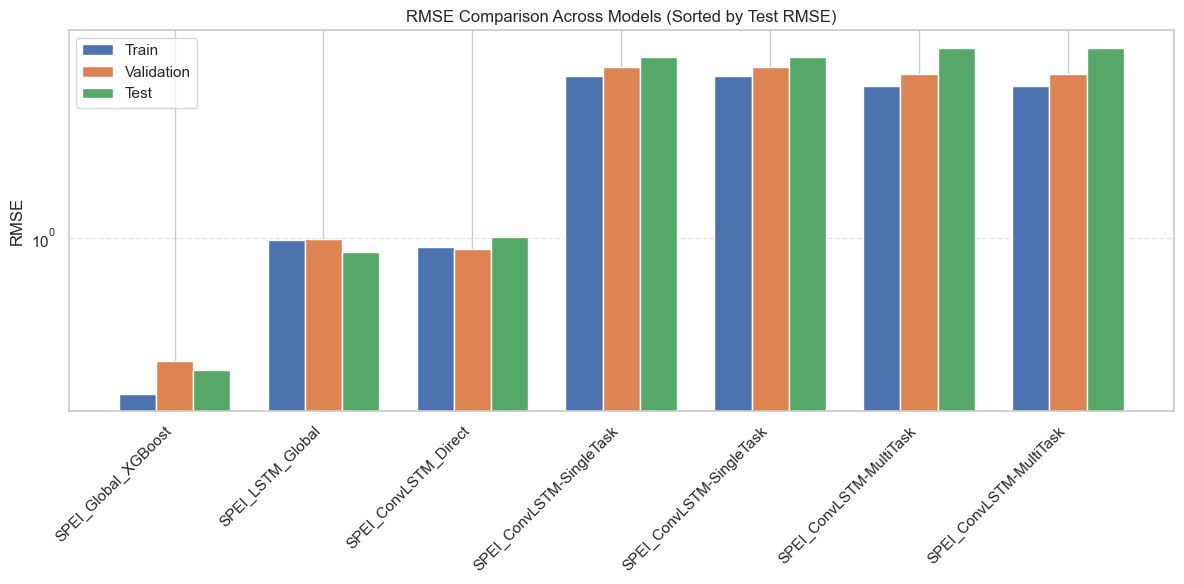

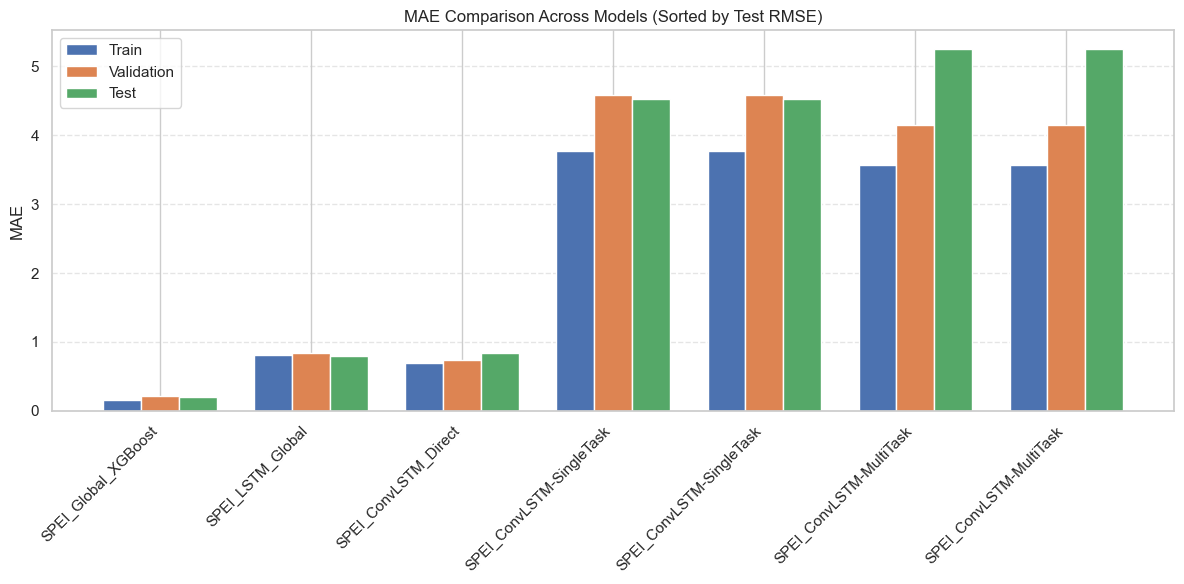

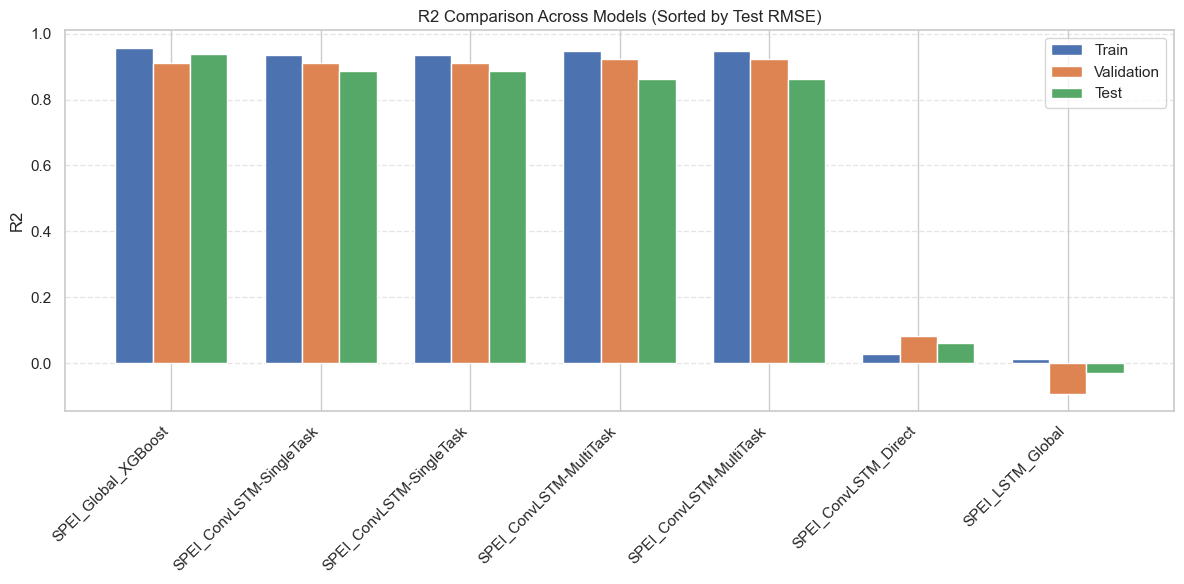

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = df_metrics_spei

# Define metrics to plot
metrics_to_plot = {
    "RMSE": ["train_rmse", "validation_rmse", "test_rmse"],
    "MAE": ["train_mae", "validation_mae", "test_mae"],
    "R2": ["train_r2", "validation_r2", "test_r2"]
}

datasets = ["Train", "Validation", "Test"]
width = 0.25

# Sort by test RMSE
df_sorted = df.sort_values(by="test_rmse", ascending=True).reset_index(drop=True)
model_names = df_sorted['folder_name'].values
x = np.arange(len(model_names))

# Plot
for metric_name, cols in metrics_to_plot.items():
    plt.figure(figsize=(12, 6))
    # if R^2 sort from high to low
    if metric_name == "R2":
        df_sorted = df_sorted.sort_values(by="test_r2", ascending=False).reset_index(drop=True)
        model_names = df_sorted['folder_name'].values
        x = np.arange(len(model_names))
    else:
        df_sorted = df_sorted.sort_values(by="test_rmse", ascending=True).reset_index(drop=True)
        model_names = df_sorted['folder_name'].values
        x = np.arange(len(model_names))
    for i, col in enumerate(cols):
        plt.bar(x + i * width, df_sorted[col], width=width, label=datasets[i])
    plt.xticks(x + width, model_names, rotation=45, ha='right')
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison Across Models (Sorted by Test RMSE)")
    plt.legend()
    if metric_name == "RMSE":
        plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [118]:
# print df_metrics_spei sorted by test RMSE
df_metrics_spei_sorted = df_metrics_spei.sort_values(by="test_rmse", ascending=True)
df_metrics_spei_sorted

,folder_name,train_rmse,train_mae,train_r2,validation_rmse,validation_mae,validation_r2,test_rmse,test_mae,test_r2
7,SPEI_Global_XGBoost,0.205586,0.155081,0.957293,0.285489,0.218081,0.910303,0.260043,0.203647,0.937353
8,SPEI_LSTM_Global,0.983780,0.808711,0.013266,0.992658,0.837766,-0.092436,0.869378,0.790397,-0.028805
6,SPEI_ConvLSTM_Direct,0.911077,0.691937,0.026297,0.893363,0.741511,0.081962,1.006960,0.840835,0.060636
0,SPEI_ConvLSTM-SingleTask,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249
0,SPEI_ConvLSTM-SingleTask,5.179156,3.776540,0.934317,5.677805,4.586584,0.911669,6.290103,4.526724,0.887249
0,SPEI_ConvLSTM-MultiTask,4.693301,3.565561,0.946062,5.318447,4.154190,0.922497,6.920429,5.258085,0.863519
0,SPEI_ConvLSTM-MultiTask,4.693301,3.565561,0.946062,5.318447,4.154190,0.922497,6.920429,5.258085,0.863519


In [119]:
df_metrics_spei_sorted.to_csv('results/spei_convlstm_improved_full_metrics.csv', index=False)